In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
dst = '../model/field_data/'
#dst = '../field_data/'
data = pd.read_csv('../field_data/merged_gxe_data.csv')
#data = pd.read_csv('../field_data/merged_data.csv')
print(data.shape)
for i,c in enumerate(data.columns):
    print(i,'\t',c)

(412, 121)
0 	 plot
1 	 New_Source
2 	 New_Pedigree
3 	 Old_Pedigree
4 	 Old_Source
5 	 Shared
6 	 New_Family
7 	 Tester
8 	 Pass
9 	 Range
10 	 Group.1
11 	 Rep
12 	 Date.Time
13 	 Harvest.Sequence
14 	 Stand.Count
15 	 GreenSnap
16 	 Stand.Count_2019GXE&Old&New&PedigreeUpdated
17 	 GreenSnap_2019GXE&Old&New&PedigreeUpdated
18 	 canopy_cover
19 	 Weight
20 	 Moisture
21 	 Test.Weight
22 	 yield_originaal_moisture
23 	 yield_dry
24 	 yield_standard
25 	 yield_standard_bu
26 	 yield_dry_gm
27 	 dry_matter/plant(kg)
28 	 Ear_Leaf_Length (cm)
29 	 Ear_Leaf_Width (cm)
30 	 Ear_Leaf_Area (cm^2)
31 	 Ear_Height (cm)
32 	 Plant_Height (cm)
33 	 Ear_Leaf_N
34 	 Total_Leaf_N
35 	 AnthesisGDD
36 	 SilkingGDD
37 	 TLA (m2)
38 	 epd
39 	 ear_leaf_weight (g)
40 	 Root Lodging
41 	 Stalk Lodging
42 	 LAI
43 	 BLUE_2019702dronemean
44 	 BLUE_STD_2019702dronemean
45 	 GREEN_2019702dronemean
46 	 GREEN_STD_2019702dronemean
47 	 NDVI_2019702dronemean
48 	 NDVI_STD_2019702dronemean
49 	 NIR_2019702dronem

In [43]:
pcorr = data.iloc[:,18:].corr(method='pearson')
pcorr

,canopy_cover,Weight,Moisture,Test.Weight,yield_originaal_moisture,yield_dry,yield_standard,yield_standard_bu,yield_dry_gm,dry_matter/plant(kg),...,RED_2019912dronemean,RED_STD_2019912dronemean,RED_EDGE_2019912dronemean,RED_EDGE_STD_2019912dronemean,2019-07-02 00:00:00,2019-07-15 00:00:00,2019-07-28 00:00:00,2019-08-12 00:00:00,2019-09-02 00:00:00,2019-09-11 00:00:00
canopy_cover,1.000000,0.376762,0.065219,-0.074059,0.376762,0.377837,0.377837,0.373441,0.377837,-0.048900,...,0.155641,0.350678,0.102000,0.041732,0.725099,0.512669,0.291056,0.228470,0.236299,-0.002747
Weight,0.376762,1.000000,0.116400,-0.086333,1.000000,0.991698,0.991698,0.979442,0.991698,0.272461,...,-0.345703,0.032415,-0.366407,-0.289437,0.328333,0.342721,0.258783,0.224427,0.194568,-0.081350
Moisture,0.065219,0.116400,1.000000,-0.252458,0.116400,-0.005373,-0.005373,0.071862,-0.005373,0.006884,...,-0.339676,-0.103606,-0.263099,-0.253275,-0.032445,0.308279,0.334863,0.318154,0.255869,0.051556
Test.Weight,-0.074059,-0.086333,-0.252458,1.000000,-0.086333,-0.053363,-0.053363,-0.251107,-0.053363,-0.018790,...,0.099293,-0.009982,0.075935,0.003533,0.013235,-0.034733,-0.016584,0.026162,-0.012479,-0.063959
yield_originaal_moisture,0.376762,1.000000,0.116400,-0.086333,1.000000,0.991698,0.991698,0.979442,0.991698,0.272461,...,-0.345703,0.032415,-0.366407,-0.289437,0.328333,0.342721,0.258783,0.224427,0.194568,-0.081350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-15 00:00:00,0.512669,0.342721,0.308279,-0.034733,0.342721,0.335496,0.335496,0.328518,0.335496,0.077947,...,0.053421,0.117484,0.104221,-0.040389,0.466888,1.000000,0.892035,0.789032,0.730856,0.002688
2019-07-28 00:00:00,0.291056,0.258783,0.334863,-0.016584,0.258783,0.250870,0.250870,0.241806,0.250870,0.088456,...,-0.018204,0.033768,0.048640,-0.073310,0.331709,0.892035,1.000000,0.865481,0.786016,0.060763
2019-08-12 00:00:00,0.228470,0.224427,0.318154,0.026162,0.224427,0.215482,0.215482,0.200642,0.215482,0.043310,...,-0.002106,0.054289,0.056683,-0.027801,0.271455,0.789032,0.865481,1.000000,0.585190,0.005347
2019-09-02 00:00:00,0.236299,0.194568,0.255869,-0.012479,0.194568,0.191322,0.191322,0.185639,0.191322,0.068829,...,-0.017607,0.000516,0.041885,-0.105734,0.266330,0.730856,0.786016,0.585190,1.000000,0.049168


In [44]:
scorr = data.iloc[:,18:].corr(method='spearman')
scorr

,canopy_cover,Weight,Moisture,Test.Weight,yield_originaal_moisture,yield_dry,yield_standard,yield_standard_bu,yield_dry_gm,dry_matter/plant(kg),...,RED_2019912dronemean,RED_STD_2019912dronemean,RED_EDGE_2019912dronemean,RED_EDGE_STD_2019912dronemean,2019-07-02 00:00:00,2019-07-15 00:00:00,2019-07-28 00:00:00,2019-08-12 00:00:00,2019-09-02 00:00:00,2019-09-11 00:00:00
canopy_cover,1.000000,0.248719,0.023807,-0.007239,0.248719,0.247591,0.247591,0.232347,0.247591,0.067862,...,0.128576,0.330951,0.005596,0.016354,0.636092,0.144287,0.021059,0.007138,0.090990,-0.002697
Weight,0.248719,1.000000,0.107303,-0.126844,1.000000,0.990997,0.990997,0.981802,0.990997,0.806189,...,-0.368548,0.007697,-0.413976,-0.303472,0.231239,0.150546,0.134392,0.029975,0.022130,-0.080816
Moisture,0.023807,0.107303,1.000000,-0.562152,0.107303,-0.005023,-0.005023,0.070004,-0.005023,0.020370,...,-0.403265,-0.093284,-0.374404,-0.289730,-0.169334,-0.010405,-0.004140,0.012671,-0.015164,0.057807
Test.Weight,-0.007239,-0.126844,-0.562152,1.000000,-0.126844,-0.059231,-0.059231,-0.214438,-0.059231,-0.027061,...,0.225783,0.077147,0.173078,0.126269,0.132842,-0.069324,0.065333,0.006979,0.028037,-0.026965
yield_originaal_moisture,0.248719,1.000000,0.107303,-0.126844,1.000000,0.990997,0.990997,0.981802,0.990997,0.806189,...,-0.368548,0.007697,-0.413976,-0.303472,0.231239,0.150546,0.134392,0.029975,0.022130,-0.080816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-15 00:00:00,0.144287,0.150546,-0.010405,-0.069324,0.150546,0.149486,0.149486,0.148368,0.149486,0.075851,...,0.089870,0.147180,0.061056,0.097230,0.212060,1.000000,0.024917,0.022063,0.111970,-0.075606
2019-07-28 00:00:00,0.021059,0.134392,-0.004140,0.065333,0.134392,0.136551,0.136551,0.125986,0.136551,0.090648,...,-0.037264,-0.001839,0.001503,-0.012058,0.074960,0.024917,1.000000,0.007117,0.055042,-0.056698
2019-08-12 00:00:00,0.007138,0.029975,0.012671,0.006979,0.029975,0.024626,0.024626,0.005724,0.024626,0.005284,...,0.038243,0.114387,0.042190,0.110290,0.043373,0.022063,0.007117,1.000000,-0.489918,-0.092831
2019-09-02 00:00:00,0.090990,0.022130,-0.015164,0.028037,0.022130,0.028704,0.028704,0.034238,0.028704,-0.038014,...,0.001532,-0.007937,0.000992,-0.061515,0.042257,0.111970,0.055042,-0.489918,1.000000,0.032444


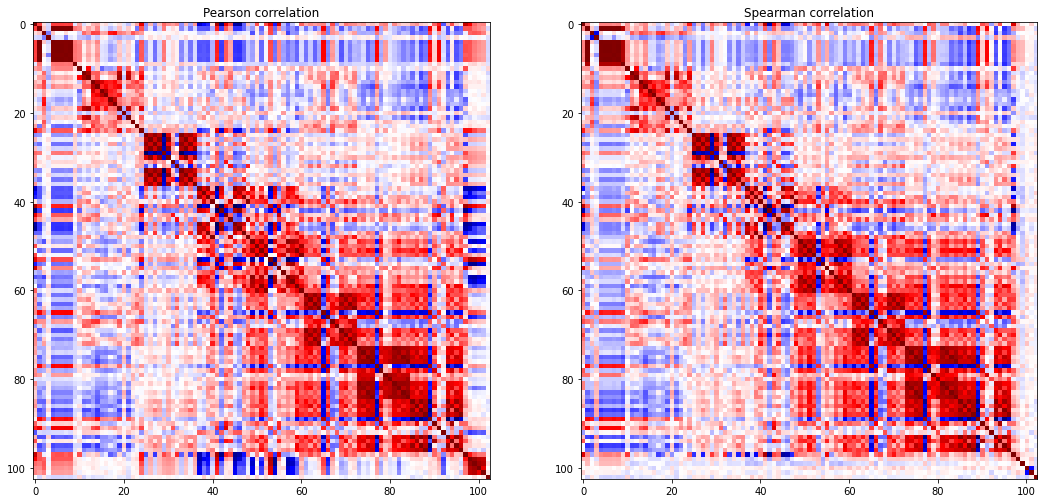

In [45]:
cmap = 'seismic'
vmax,vmin = 1,-1

fig, ax = plt.subplots(1,2,figsize=(18,9))

i = 0
ax[i].imshow(np.array(pcorr), cmap=cmap, vmax=vmax, vmin=vmin)
ax[i].set_title('Pearson correlation')

i = 1
ax[i].imshow(np.array(scorr), cmap=cmap, vmax=vmax, vmin=vmin)
ax[i].set_title('Spearman correlation');

In [46]:
ss = list(range(25)) + list(range(97, len(scorr)))

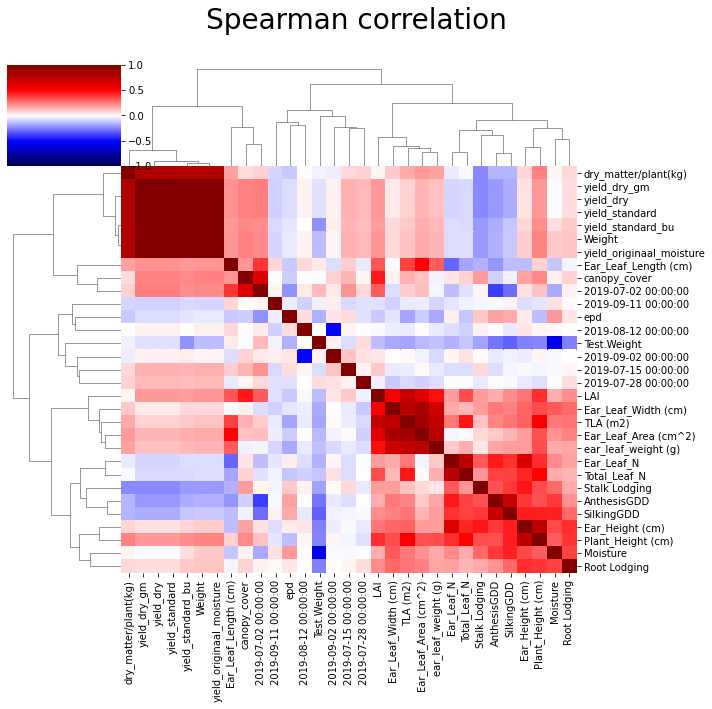

In [47]:
sns.clustermap(scorr.iloc[ss, ss], method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Spearman correlation', fontsize=28)

filename = dst + 'spearman_correlation_sub.jpg'
plt.savefig(filename, dpi=130, format='jpg', pil_kwargs={'optimize':True}, bbox_inches='tight')

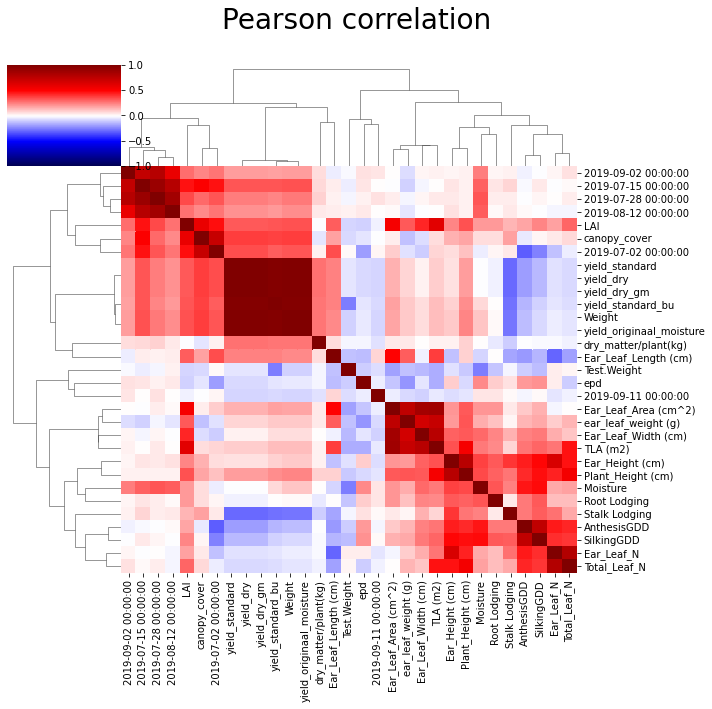

In [48]:
sns.clustermap(pcorr.iloc[ss,ss], method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Pearson correlation', fontsize=28)

filename = dst + 'pearson_correlation_sub.jpg'
plt.savefig(filename, dpi=130, format='jpg', pil_kwargs={'optimize':True}, bbox_inches='tight')

# Sklearn

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [50]:
pheno = data.iloc[:, 19:43].copy()
pheno_scaled = StandardScaler().fit_transform(pheno)
pheno

,Weight,Moisture,Test.Weight,yield_originaal_moisture,yield_dry,yield_standard,yield_standard_bu,yield_dry_gm,dry_matter/plant(kg),Ear_Leaf_Length (cm),...,Ear_Leaf_N,Total_Leaf_N,AnthesisGDD,SilkingGDD,TLA (m2),epd,ear_leaf_weight (g),Root Lodging,Stalk Lodging,LAI
0,22.01,24.0,53.8,8715.96,6624.12960,7839.206627,145.710160,627.245290,0.439100,84.50,...,12.5,17.5,1192.25,1247.60,0.507814,69.090323,7.0,0,22,4.174086
1,17.20,23.6,56.2,6811.20,5203.75680,6158.292071,109.578151,492.748805,0.353359,88.10,...,12.5,17.5,1247.60,1270.20,0.521303,85.590164,6.5,1,20,4.182941
2,20.66,24.6,55.5,8181.36,6168.74544,7300.290462,131.536765,584.124520,0.477065,91.95,...,12.5,18.5,1227.50,1270.20,0.621483,76.621053,8.2,0,2,4.378639
3,19.37,23.6,105.0,7670.52,5860.27728,6935.239385,66.049899,554.915369,0.379431,70.25,...,13.5,18.5,1247.60,1270.20,0.436974,70.062637,6.0,1,17,3.677318
4,16.53,26.6,55.8,6545.88,4804.67592,5686.007006,101.899767,454.959447,0.338649,89.00,...,13.0,18.0,1247.60,1270.20,0.647247,76.621053,8.7,3,19,5.003510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,24.76,21.8,57.5,9804.96,7667.47872,9073.939314,157.807640,726.041035,0.485158,88.70,...,11.5,17.0,1124.05,1209.45,0.539299,69.516484,7.6,0,0,4.221792
408,21.65,23.6,54.0,8573.40,6550.07760,7751.571124,143.547613,620.233234,0.461671,85.40,...,12.5,18.0,1192.25,1270.20,0.525353,75.313158,6.3,6,9,4.061208
409,20.88,22.8,57.0,8268.48,6383.26656,7554.161609,132.529151,604.437734,0.413293,88.75,...,12.0,17.0,1150.25,1209.45,0.556299,70.062637,8.5,1,4,4.735924
410,21.39,22.3,56.9,8470.44,6581.53188,7788.795124,136.885679,623.211670,0.441532,89.35,...,11.0,16.5,1124.05,1174.60,0.572515,69.516484,9.3,0,3,3.921588


In [94]:
#y = data['canopy_cover'].values
y = data['2019-07-02 00:00:00'].values

y_scaled = (y - y.mean())/y.std()
y

array([55.75129056, 38.41822656, 39.68252064, 46.1875176 , 52.03997568,
       60.155928  , 65.33545536, 60.84925056, 61.3794384 , 68.04757008,
       64.9480104 , 64.86644304, 59.87044224, 56.24069472, 67.68051696,
       55.18031904, 67.21150464, 57.87204192, 61.7872752 , 60.70650768,
       33.36105024, 57.21950304, 38.8464552 , 67.82325984, 57.95360928,
       64.68291648, 58.81006656, 68.74089264, 61.8892344 , 60.58415664,
       65.51898192, 69.6381336 , 58.8304584 , 64.17312048, 69.88283568,
       56.09795184, 61.86884256, 73.14553008, 64.51978176, 51.30586944,
       42.45581088, 57.097152  , 65.47819824, 63.214704  , 58.2187032 ,
       61.50178944, 47.2071096 , 48.26748528, 44.78048064, 38.62214496,
       40.41662688, 55.13953536, 45.24949296, 44.20950912, 60.01318512,
       60.4618056 , 70.00518672, 67.76208432, 70.69850928, 61.72609968,
       61.50178944, 59.99279328, 73.1047464 , 68.29227216, 67.06876176,
       69.47499888, 66.00838608, 70.57615824, 74.91962016, 63.21

In [119]:
svr = SVR(kernel='rbf', C=150, gamma=0.1, epsilon=.01)
#svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.01, coef0=0)
#svr = SVR(kernel='linear', C=100, gamma='auto')

In [120]:
ypred = svr.fit(pheno_scaled, y).predict(pheno_scaled)

In [121]:
err = np.sum((y - ypred)**2)
err

0.04189514299113377

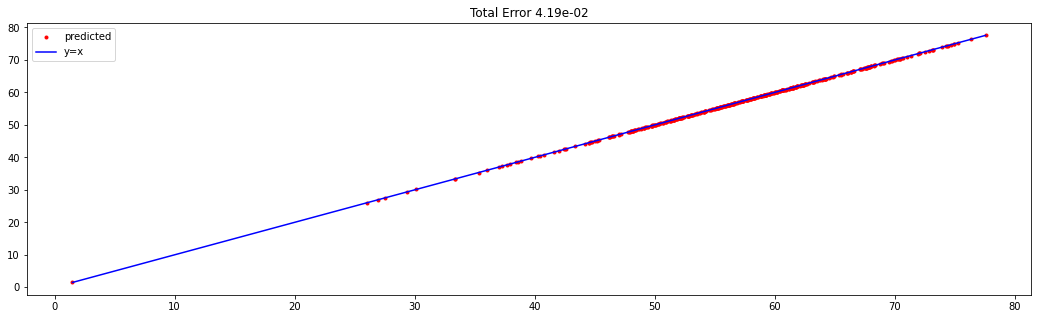

In [122]:
xaxis = np.linspace(np.min(y), np.max(y), 100)
plt.figure(figsize=(18,5))
plt.plot(y, ypred,'.r', label='predicted')
#plt.plot(ypred, '.b', label='predicted');
plt.plot(xaxis, xaxis, 'b', label='y=x')
plt.title('Total Error {:.2e}'.format(err));
plt.legend();

In [123]:
X_train, X_test, y_train, y_test = train_test_split(pheno_scaled,
                                                    y,
                                                    test_size=0.2)

In [124]:
svr_params = {'C':150, 'kernel':'rbf', 'gamma':0.1, 'epsilon':.01}
#svr_params = {'C':100, 'kernel':'poly', 'gamma':'auto', 'epsilon':0.01, 'coef0':1}
svr = SVR(**svr_params).fit(X_train, y_train)
print(svr.score(X_test, y_test))

0.23752232104555848


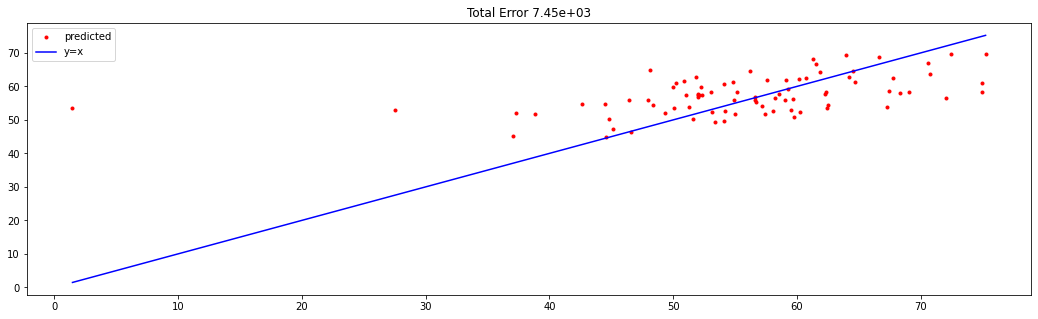

In [125]:
ypred = svr.predict(X_test)
err = np.sum((y_test - ypred)**2)

xaxis = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.figure(figsize=(18,5))
plt.plot(y_test, ypred,'.r', label='predicted')
#plt.plot(ypred, '.b', label='predicted');
plt.plot(xaxis, xaxis, 'b', label='y=x')
plt.title('Total Error {:.2e}'.format(err));
plt.legend();

# PCA

In [108]:
y_var = (y - y.min())/(y.max() - y.min())

In [67]:
from sklearn.decomposition import PCA, KernelPCA

In [110]:
pca = PCA(n_components=2)
pca.fit(pheno_scaled)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.27885566 0.22202452]
[52.51023457 46.85486592]


In [111]:
prcomp = pca.transform(pheno_scaled)

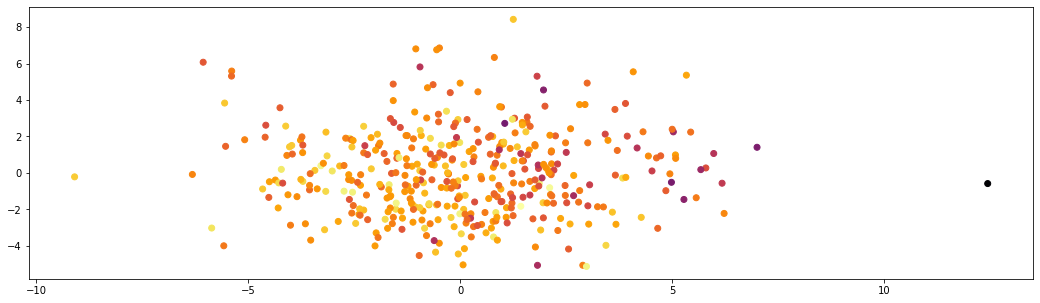

In [112]:
plt.figure(figsize=(18,5))

plt.scatter(prcomp[:,0], prcomp[:,1], c=y_var, cmap='inferno');

# KPCA

In [113]:
kpca = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=True, gamma=0.25)
X_kpca = kpca.fit_transform(pheno_scaled)

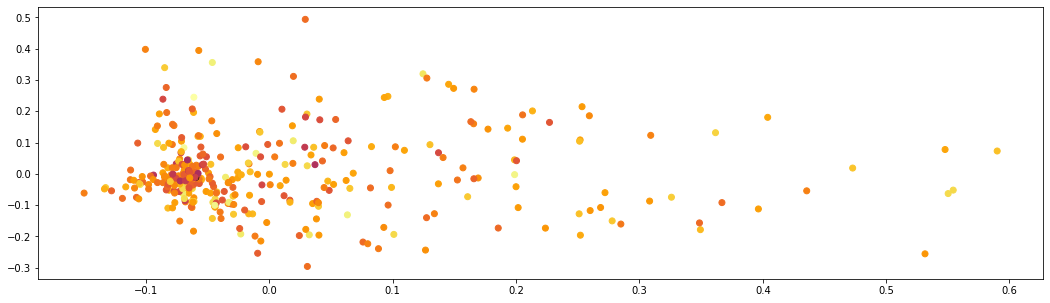

In [114]:
plt.figure(figsize=(18,5))

plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y_var, cmap='inferno');

In [ ]:
#